In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('/home/aditya/Downloads/HappinessAlcoholConsumption.csv')
sumcol = df["Beer_PerCapita"] + df["Spirit_PerCapita"] + df["Wine_PerCapita"]
df["Alcohol"] = sumcol/3;
data = df[['Country','Alcohol','HappinessScore']]
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcohol
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,194.333333
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,188.333333
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,124.000000
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,123.000000
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,164.333333


In [66]:
data.head()

,Country,Alcohol,HappinessScore
0,Denmark,194.333333,7.526
1,Switzerland,188.333333,7.509
2,Iceland,124.000000,7.501
3,Norway,123.000000,7.498
4,Finland,164.333333,7.413


In [67]:
A = data[["Alcohol","HappinessScore"]]
A.tail()

,Alcohol,HappinessScore
117,14.333333,3.666
118,57.666667,3.622
119,17.000000,3.484
120,19.000000,3.303
121,18.666667,3.069


In [68]:
matrix = np.array(A.values,'float')
matrix[0:5,:]

array([[194.33333333,   7.526     ],
       [188.33333333,   7.509     ],
       [124.        ,   7.501     ],
       [123.        ,   7.498     ],
       [164.33333333,   7.413     ]])

In [94]:
x = matrix[:,0]
y = matrix[:,1]
print(y.size)

122


In [95]:
#feature normalisation
#we do this cuz it would make the input values smaller so that later computation will be faster and efficient.
x= x/(np.max(x))

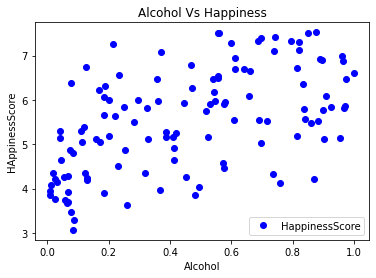

In [96]:
import matplotlib.pyplot as plt
plt.plot(x,y,'bo')
plt.ylabel("HAppinessScore")
plt.xlabel("Alcohol")
plt.legend(['HappinessScore'])
plt.title('Alcohol Vs Happiness')
plt.show()

In [107]:
def computecost(x1,y1,theta):
    #m = y.size
    a = (1/(2*m))
    b = np.sum(((np.dot(x1,theta))-y1)**2)
    w = b*a
    return w

In [100]:
m = np.size(x)
n = np.size(y)
print(m,'\n',n)

122 
 122


In [101]:
m = np.size(y)
x = x.reshape([m,1])
x = np.hstack([x,np.ones_like(x)])

theta = np.zeros((2,1))

In [108]:
print(computecost(x,y,theta))

1941.7825705000002


In [109]:
def gradient(x,y,theta):
    alpha = 0.00001
    iteration = 2000
    J_history = np.zeros([iteration,1])
    for iter in range(0,iteration):
            error = (x@theta) - y
            temp1 = theta[0] - (1/m)*(alpha*(np.sum(error*x[:,0])))
            temp2 = theta[1] - (1/m)*alpha*(np.sum(error*x[:,1]))
            theta = np.reshape([temp1,temp2],(2,1))
            J_history[iter] = (1/(2*m))*(np.sum(((x@theta) - y)**2))
    return theta, J_history

In [110]:
theta,J = gradient(x,y,theta)
print(theta)

[[2.38031097]
 [4.22499706]]


In [111]:
print(J)

[[1936.24274283]
 [1930.71941566]
 [1925.21254022]
 ...
 [ 115.49668262]
 [ 115.49460323]
 [ 115.49255932]]
